In [19]:
! git clone --recursive [GITHUB LINK REPO]    

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --reference-if-able <repo>
                          reference repository
    --dissociate          use --reference only 

In [20]:
! git clone --recursive https://github.com/seyedalirezaabbaspour/Recognize-Persian-handwritten-numbers-with-keras.git

fatal: destination path 'Recognize-Persian-handwritten-numbers-with-keras' already exists and is not an empty directory.


In [21]:
!pwd

/content


In [22]:
!ls

CNN_Persian_Handwritten_Number.ipynb
Data_hoda_full.mat
dataset_hoda.py
datasets
__pycache__
README.md
Recognize-Persian-handwritten-numbers-with-keras
sample_data


In [23]:
!ls Recognize-Persian-handwritten-numbers-with-keras

In [24]:
! mv /content/Recognize-Persian-handwritten-numbers-with-keras/* /content

mv: cannot stat '/content/Recognize-Persian-handwritten-numbers-with-keras/*': No such file or directory


In [25]:
!ls

CNN_Persian_Handwritten_Number.ipynb
Data_hoda_full.mat
dataset_hoda.py
datasets
__pycache__
README.md
Recognize-Persian-handwritten-numbers-with-keras
sample_data


In [26]:
!mv /content/datasets/* /content

mv: cannot stat '/content/datasets/*': No such file or directory


In [27]:
!ls

CNN_Persian_Handwritten_Number.ipynb
Data_hoda_full.mat
dataset_hoda.py
datasets
__pycache__
README.md
Recognize-Persian-handwritten-numbers-with-keras
sample_data


#  Convolutional Neural Network

In [28]:
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

from dataset_hoda import load_hoda

In [29]:
#load dataset
X_train_original, y_train_original, X_test_original, y_test_original = load_hoda(training_sample_size=50000,
                                                                                 test_sample_size=10000,
                                                                                 size = 28)

In [30]:
#preprocessing

''' input data in numpy array format'''
X_train = np.array(X_train_original)
X_test = np.array(X_test_original)


''' normalize our data values to the range [0, 1]'''
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train/ 255.0
X_test = X_test  / 255.0

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# preprocessing class labels
y_train = keras.utils.to_categorical(y_train_original)
y_test = keras.utils.to_categorical(y_test_original)

In [31]:
# test and validation set
X_validation = X_train[:10000]
y_validation = y_train[:10000]

X_train = X_train[10000:]
y_train = y_train[10000:]

In [15]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (2, 2),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (2, 2), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (2, 2), activation="relu", padding= "same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         3

In [ ]:
# Compile Model
adam = Adam(lr = 0.003)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

In [ ]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=100, 
          batch_size=256)

Epoch 1/100
16/16 [==============================] - 6s 343ms/step - loss: 1.6225 - acc: 0.4150 - val_loss: 0.4029 - val_acc: 0.8940
Epoch 2/100
16/16 [==============================] - 6s 363ms/step - loss: 0.4482 - acc: 0.8497 - val_loss: 0.1982 - val_acc: 0.9410
Epoch 3/100
16/16 [==============================] - 6s 354ms/step - loss: 0.2799 - acc: 0.9048 - val_loss: 0.1509 - val_acc: 0.9590
Epoch 4/100
16/16 [==============================] - 6s 402ms/step - loss: 0.1862 - acc: 0.9367 - val_loss: 0.1080 - val_acc: 0.9690
Epoch 5/100
16/16 [==============================] - 6s 356ms/step - loss: 0.1625 - acc: 0.9455 - val_loss: 0.0972 - val_acc: 0.9740
Epoch 6/100
16/16 [==============================] - 6s 348ms/step - loss: 0.1255 - acc: 0.9588 - val_loss: 0.0882 - val_acc: 0.9790
Epoch 7/100
16/16 [==============================] - 5s 328ms/step - loss: 0.1154 - acc: 0.9604 - val_loss: 0.0736 - val_acc: 0.9740
Epoch 8/100
16/16 [==============================] - 6s 353ms/step - 

16/16 [==============================] - 6s 364ms/step - loss: 0.0200 - acc: 0.9914 - val_loss: 0.0476 - val_acc: 0.9850
Epoch 63/100
16/16 [==============================] - 5s 337ms/step - loss: 0.0193 - acc: 0.9940 - val_loss: 0.0487 - val_acc: 0.9870
Epoch 64/100
16/16 [==============================] - 5s 319ms/step - loss: 0.0108 - acc: 0.9965 - val_loss: 0.0575 - val_acc: 0.9860
Epoch 65/100
16/16 [==============================] - 5s 318ms/step - loss: 0.0164 - acc: 0.9927 - val_loss: 0.0538 - val_acc: 0.9870
Epoch 66/100
16/16 [==============================] - 6s 396ms/step - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0600 - val_acc: 0.9870
Epoch 67/100
16/16 [==============================] - 6s 370ms/step - loss: 0.0175 - acc: 0.9937 - val_loss: 0.0559 - val_acc: 0.9860
Epoch 68/100
16/16 [==============================] - 6s 374ms/step - loss: 0.0113 - acc: 0.9977 - val_loss: 0.0513 - val_acc: 0.9880
Epoch 69/100
16/16 [==============================] - 6s 356ms/step - loss:

In [ ]:
#Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 14ms/step - loss: 0.0916 - acc: 0.9800


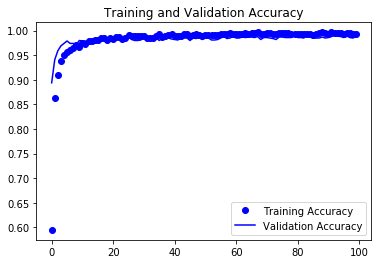

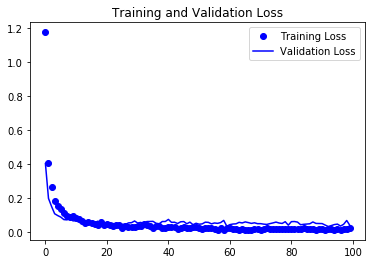

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [20]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (3, 3),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation="relu", padding= "same"))
model.add(Conv2D(256, (3, 3), activation="relu", padding= "valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)        

In [21]:
# Compile Model
adam = Adam(lr = 0.003)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

In [22]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=100, 
          batch_size=256)

Epoch 1/100
16/16 [==============================] - 1s 43ms/step - loss: 2.1818 - acc: 0.2025 - val_loss: 0.8799 - val_acc: 0.8020
Epoch 2/100
16/16 [==============================] - 0s 16ms/step - loss: 0.6589 - acc: 0.7790 - val_loss: 0.1834 - val_acc: 0.9440
Epoch 3/100
16/16 [==============================] - 0s 15ms/step - loss: 0.2739 - acc: 0.9059 - val_loss: 0.1081 - val_acc: 0.9620
Epoch 4/100
16/16 [==============================] - 0s 14ms/step - loss: 0.1715 - acc: 0.9414 - val_loss: 0.0930 - val_acc: 0.9730
Epoch 5/100
16/16 [==============================] - 0s 15ms/step - loss: 0.1323 - acc: 0.9536 - val_loss: 0.0847 - val_acc: 0.9740
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 0.1243 - acc: 0.9587 - val_loss: 0.0631 - val_acc: 0.9820
Epoch 7/100
16/16 [==============================] - 0s 14ms/step - loss: 0.1030 - acc: 0.9665 - val_loss: 0.0683 - val_acc: 0.9740
Epoch 8/100
16/16 [==============================] - 0s 15ms/step - loss: 0.

In [23]:
#Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0835 - acc: 0.9870


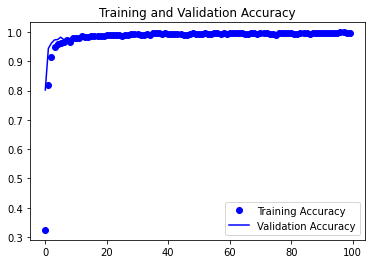

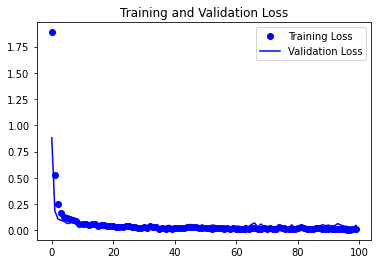

In [24]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [15]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(64, (3, 3),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(128, (3, 3), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(1256, (3, 3), activation="relu", padding= "same"))
model.add(Conv2D(512, (3, 3), activation="relu", padding= "valid"))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 1256)        1

In [26]:
# Compile Model
adam = Adam(lr = 0.003)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

In [27]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=100, 
          batch_size=256)

Epoch 1/100
16/16 [==============================] - 4s 142ms/step - loss: 4.1523 - acc: 0.1065 - val_loss: 2.3084 - val_acc: 0.0890
Epoch 2/100
16/16 [==============================] - 1s 48ms/step - loss: 1.8315 - acc: 0.3561 - val_loss: 2.3875 - val_acc: 0.1860
Epoch 3/100
16/16 [==============================] - 1s 47ms/step - loss: 1.1379 - acc: 0.6097 - val_loss: 1.5478 - val_acc: 0.4280
Epoch 4/100
16/16 [==============================] - 1s 47ms/step - loss: 0.7349 - acc: 0.7282 - val_loss: 1.2211 - val_acc: 0.5720
Epoch 5/100
16/16 [==============================] - 1s 47ms/step - loss: 0.4915 - acc: 0.8231 - val_loss: 0.8219 - val_acc: 0.6950
Epoch 6/100
16/16 [==============================] - 1s 47ms/step - loss: 0.3621 - acc: 0.8762 - val_loss: 0.4809 - val_acc: 0.8360
Epoch 7/100
16/16 [==============================] - 1s 47ms/step - loss: 0.2572 - acc: 0.9111 - val_loss: 0.2841 - val_acc: 0.9250
Epoch 8/100
16/16 [==============================] - 1s 47ms/step - loss: 0

In [28]:
#Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 7ms/step - loss: 0.0520 - acc: 0.9840


In [19]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (3, 3),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation = "relu", padding="valid"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation="relu", padding= "valid"))
model.add(Conv2D(256, (3, 3), activation="relu", padding= "same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)        

In [20]:
# Compile Model
adam = Adam(lr = 0.003)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

In [21]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=100, 
          batch_size=256)

Epoch 1/100
16/16 [==============================] - 34s 55ms/step - loss: 2.1352 - acc: 0.2255 - val_loss: 0.9629 - val_acc: 0.7520
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.6823 - acc: 0.7571 - val_loss: 0.2941 - val_acc: 0.9060
Epoch 3/100
16/16 [==============================] - 0s 13ms/step - loss: 0.2764 - acc: 0.8960 - val_loss: 0.1872 - val_acc: 0.9570
Epoch 4/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1953 - acc: 0.9422 - val_loss: 0.1457 - val_acc: 0.9560
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1818 - acc: 0.9352 - val_loss: 0.0982 - val_acc: 0.9710
Epoch 6/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1159 - acc: 0.9566 - val_loss: 0.0909 - val_acc: 0.9750
Epoch 7/100
16/16 [==============================] - 0s 13ms/step - loss: 0.1115 - acc: 0.9629 - val_loss: 0.0734 - val_acc: 0.9750
Epoch 8/100
16/16 [==============================] - 0s 13ms/step - loss: 0

In [22]:
#Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0621 - acc: 0.9860


In [23]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (4, 4), activation="relu", padding= "same"))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)        

In [24]:
# Compile Model
adam = Adam(lr = 0.003)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

In [25]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=100, 
          batch_size=256)

Epoch 1/100
16/16 [==============================] - 2s 54ms/step - loss: 2.3404 - acc: 0.1440 - val_loss: 1.1596 - val_acc: 0.6610
Epoch 2/100
16/16 [==============================] - 0s 21ms/step - loss: 1.0843 - acc: 0.5965 - val_loss: 0.4580 - val_acc: 0.8670
Epoch 3/100
16/16 [==============================] - 0s 22ms/step - loss: 0.4862 - acc: 0.8363 - val_loss: 0.1830 - val_acc: 0.9430
Epoch 4/100
16/16 [==============================] - 0s 22ms/step - loss: 0.2320 - acc: 0.9208 - val_loss: 0.1321 - val_acc: 0.9580
Epoch 5/100
16/16 [==============================] - 0s 22ms/step - loss: 0.1663 - acc: 0.9430 - val_loss: 0.1129 - val_acc: 0.9620
Epoch 6/100
16/16 [==============================] - 0s 22ms/step - loss: 0.1583 - acc: 0.9506 - val_loss: 0.0755 - val_acc: 0.9770
Epoch 7/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0906 - acc: 0.9724 - val_loss: 0.0819 - val_acc: 0.9760
Epoch 8/100
16/16 [==============================] - 0s 22ms/step - loss: 0.

In [26]:
#Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 0.0498 - acc: 0.9880


In [31]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (4, 4), activation="relu", padding= "same"))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 128)        

In [35]:
# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

In [36]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=200, 
          batch_size=512)

Epoch 1/200
8/8 [==============================] - 2s 161ms/step - loss: 2.1279 - acc: 0.2065 - val_loss: 1.0756 - val_acc: 0.6860
Epoch 2/200
8/8 [==============================] - 0s 37ms/step - loss: 1.1027 - acc: 0.6096 - val_loss: 0.5691 - val_acc: 0.8250
Epoch 3/200
8/8 [==============================] - 0s 38ms/step - loss: 0.6355 - acc: 0.7744 - val_loss: 0.3600 - val_acc: 0.8940
Epoch 4/200
8/8 [==============================] - 0s 37ms/step - loss: 0.4403 - acc: 0.8450 - val_loss: 0.2165 - val_acc: 0.9360
Epoch 5/200
8/8 [==============================] - 0s 37ms/step - loss: 0.2890 - acc: 0.8966 - val_loss: 0.1701 - val_acc: 0.9490
Epoch 6/200
8/8 [==============================] - 0s 38ms/step - loss: 0.2099 - acc: 0.9290 - val_loss: 0.1396 - val_acc: 0.9570
Epoch 7/200
8/8 [==============================] - 0s 37ms/step - loss: 0.1924 - acc: 0.9357 - val_loss: 0.1133 - val_acc: 0.9670
Epoch 8/200
8/8 [==============================] - 0s 38ms/step - loss: 0.1394 - acc: 0.9

In [37]:
#Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0655 - acc: 0.9850


In [38]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (4, 4), activation="relu", padding= "same"))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 128)        

In [39]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=200, 
          batch_size=128)

loss, acc = model.evaluate(X_test, y_test)

Epoch 1/200
32/32 [==============================] - 2s 21ms/step - loss: 1.7197 - acc: 0.3596 - val_loss: 0.3914 - val_acc: 0.8700
Epoch 2/200
32/32 [==============================] - 0s 13ms/step - loss: 0.4523 - acc: 0.8376 - val_loss: 0.1789 - val_acc: 0.9550
Epoch 3/200
32/32 [==============================] - 0s 12ms/step - loss: 0.2671 - acc: 0.9173 - val_loss: 0.1056 - val_acc: 0.9700
Epoch 4/200
32/32 [==============================] - 0s 12ms/step - loss: 0.1628 - acc: 0.9472 - val_loss: 0.0934 - val_acc: 0.9720
Epoch 5/200
32/32 [==============================] - 0s 12ms/step - loss: 0.1153 - acc: 0.9596 - val_loss: 0.0777 - val_acc: 0.9760
Epoch 6/200
32/32 [==============================] - 0s 12ms/step - loss: 0.1024 - acc: 0.9697 - val_loss: 0.0851 - val_acc: 0.9750
Epoch 7/200
32/32 [==============================] - 0s 13ms/step - loss: 0.1252 - acc: 0.9620 - val_loss: 0.0724 - val_acc: 0.9790
Epoch 8/200
32/32 [==============================] - 0s 12ms/step - loss: 0.

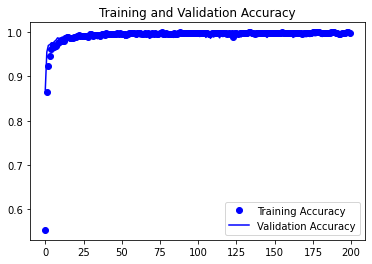

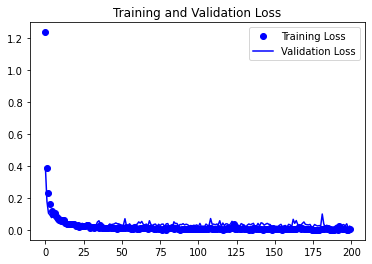

In [40]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 128)        

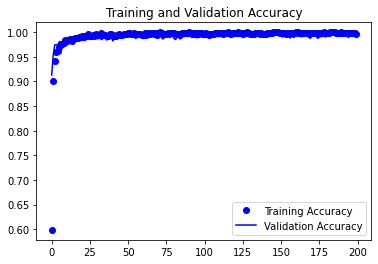

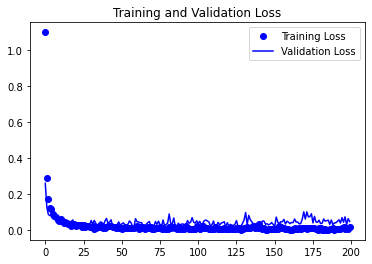

In [41]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (4, 4), activation="relu", padding= "same"))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])


# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=200, 
          batch_size=64)

loss, acc = model.evaluate(X_test, y_test)

print(f"\nTest Loss : {loss:.2f} Test Accuracy : {acc:.2f}")

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 128)       131200    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 256)       

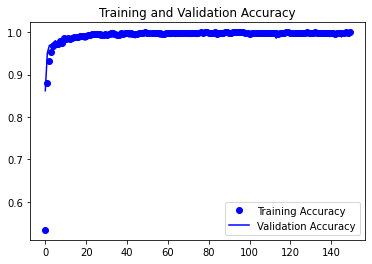

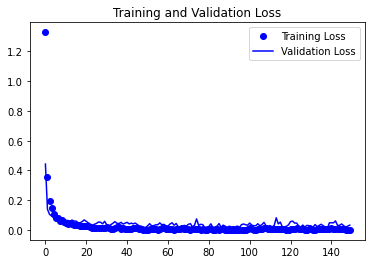

In [43]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(64, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "same"))
model.add(Conv2D(512, (4, 4), activation="relu", padding= "valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])


# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=150, 
          batch_size=200)

loss, acc = model.evaluate(X_test, y_test)

print(f"\nTest Loss : {loss:.4f} Test Accuracy : {acc:.4f}")

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 128)       131200    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 7, 7, 256)       

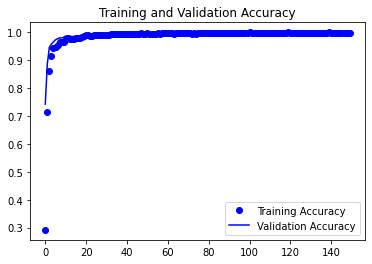

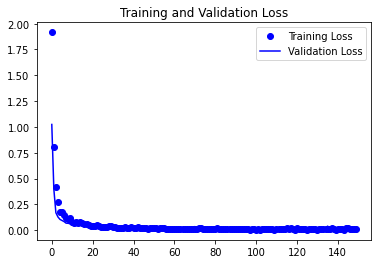

In [44]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(64, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(128, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Conv2D(512, (4, 4), activation="relu", padding= "valid"))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))
model.summary()

# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])


# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=150, 
          batch_size=200)

loss, acc = model.evaluate(X_test, y_test)

print(f"\nTest Loss : {loss:.4f} Test Accuracy : {acc:.4f}")

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 9, 9, 128)         131200    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 3, 3, 256)       

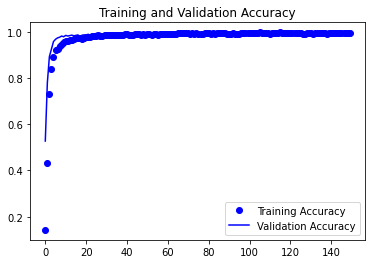

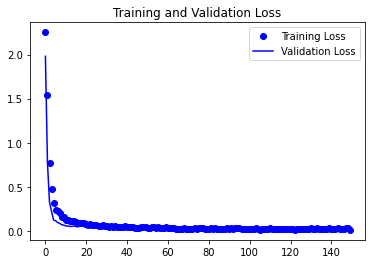

In [50]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(64, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(3, 3))
model.add(Dropout(0.6))
model.add(Conv2D(128, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(3, 3))
model.add(Dropout(0.6))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Conv2D(512, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))
model.summary()

# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])


# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=150, 
          batch_size=200)

loss, acc = model.evaluate(X_test, y_test)

print(f"\nTest Loss : {loss:.4f} Test Accuracy : {acc:.4f}")

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       131200    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 256)        

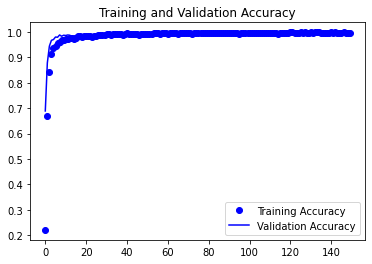

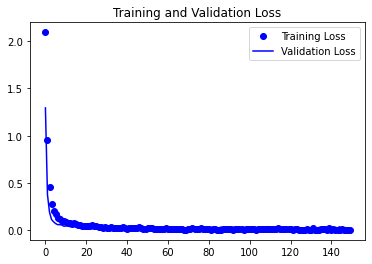

In [18]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(64, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(128, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Conv2D(512, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))
model.summary()

# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])


# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=150, 
          batch_size=200)

loss, acc = model.evaluate(X_test, y_test)

print(f"\nTest Loss : {loss:.4f} Test Accuracy : {acc:.4f}")

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 128)       131200    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 256)        

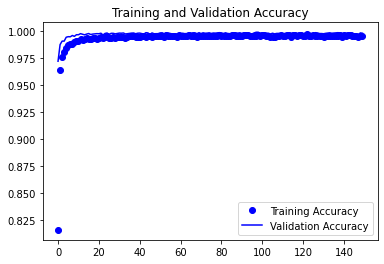

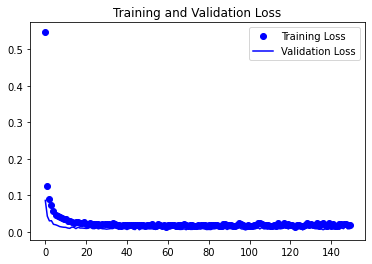

In [33]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(64, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(128, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Conv2D(300, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))
model.summary()


# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])


# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=150, 
          batch_size=200)

loss, acc = model.evaluate(X_test, y_test)

print(f"\nTest Loss : {loss:.4f} Test Accuracy : {acc:.4f}")

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()